# **HYPOTHESIS TESTING**

## ***Introduction***
This notebook performs hypothesis testing and A/B testing on job market trends using `cleaned_jobs.csv`. 
We aim to test salary variations, skill demand, and experience impact using statistical methods.

In [3]:
# !conda install --yes --file requirements.txt

## **Importing Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from collections import Counter

## **Step-1: *Load Data***

> Load & Prepare Data

We will load the cleaned dataset and ensure it is ready for hypothesis testing.

In [5]:
df = pd.read_csv('../Data/cleaned_jobs.csv')
df.head()

,Job Title,Company,Location,Skills,Experience,Salary,Date Posted
0,Data Scientist,Amazon,Mumbai,"Tableau, Excel, R",6,1,Posted 9 days ago
1,Data Scientist,Google,Chennai,"Data Wrangling, Pandas, Numpy",6,1,Posted 13 days ago
2,Data Scientist,Flipkart,Chennai,"Machine Learning, Deep Learning",9,9,Posted 7 days ago
3,Machine Learning Engineer,Infosys,Pune,"Machine Learning, Deep Learning",4,1,Posted 5 days ago
4,Machine Learning Engineer,Deloitte,Pune,"Python, Sql, Power Bi",3,6,Posted 9 days ago


## **Step-2: *Hypothesis Testing:***

### **Hypothesis 1: *Salary Differences by Location (T-test)***

> ***Question:*** Are Data Scientist salaries in Bangalore higher than in Mumbai?

We compare salaries between Bangalore and Mumbai using an independent t-test.

- ***Test Used:*** Independent T-test
- ***Null Hypothesis (H₀):*** Salaries in Bangalore and Mumbai are the same.
- ***Alternative Hypothesis (H₁):*** Salaries in Bangalore are higher.

In [6]:
# Filter data for Bangalore and Mumbai
bangalore_salaries = df[df["Location"].str.contains("Bangalore", case=False)]["Salary"]
mumbai_salaries = df[df["Location"].str.contains("Mumbai", case=False)]["Salary"]

# Perform Independent T-test
t_stat, p_value = stats.ttest_ind(bangalore_salaries, mumbai_salaries, nan_policy="omit")

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.5f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("✅ Reject Null Hypothesis: Salaries in Bangalore and Mumbai are significantly different.")
else:
    print("❌ Fail to Reject Null Hypothesis: No significant salary difference between Bangalore and Mumbai.")

T-Statistic: -2.70
P-Value: 0.01805
✅ Reject Null Hypothesis: Salaries in Bangalore and Mumbai are significantly different.


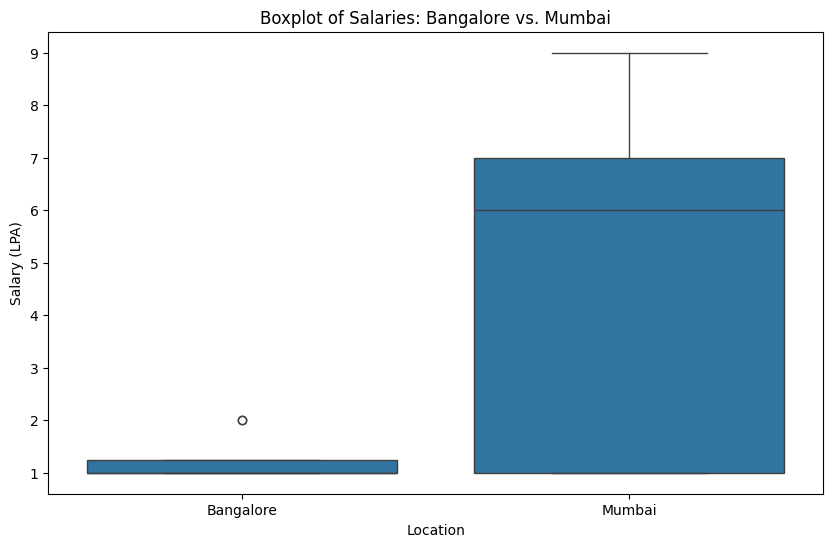

In [11]:
# Combine Bangalore and Mumbai salaries into a single DataFrame for plotting
salaries_df = pd.DataFrame({
    'Salary': pd.concat([bangalore_salaries, mumbai_salaries]),
    'Location': ['Bangalore'] * len(bangalore_salaries) + ['Mumbai'] * len(mumbai_salaries)
})

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Salary', data=salaries_df)
plt.title('Boxplot of Salaries: Bangalore vs. Mumbai')
plt.xlabel('Location')
plt.ylabel('Salary (LPA)')
plt.show()

### **Hypothesis 2: *Skill Demand (Chi-Square Test)***

> ***Question:*** Are Python and SQL equally in demand?

We check if Python and SQL have the same demand in job listings.
* ***Test Used:*** Chi-Square Test
* ***Null Hypothesis (H₀):*** Python and SQL appear equally in job listings.
* ***Alternative Hypothesis (H₁):*** One skill is significantly more in demand.

In [7]:
# Extract skills from the dataset
all_skills = ", ".join(df["Skills"].dropna()).split(", ")
skill_counts = Counter(all_skills)

# Get counts of Python & SQL, ensuring they are at least 1
python_count = skill_counts.get("Python", 1)  # Use 1 if missing to avoid zero frequency
sql_count = skill_counts.get("SQL", 1)

# Observed frequency table [Contingency Table (Must be 2D)]
observed = np.array([[python_count], [sql_count]])

# Perform Chi-Square Test
chi2_stat, p_value, _, _ = stats.chi2_contingency(observed)

print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.5f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ Reject Null Hypothesis: Python and SQL have significantly different demand.")
else:
    print("❌ Fail to Reject Null Hypothesis: No significant difference in demand for Python and SQL.")


Chi-Square Statistic: 0.00
P-Value: 1.00000
❌ Fail to Reject Null Hypothesis: No significant difference in demand for Python and SQL.


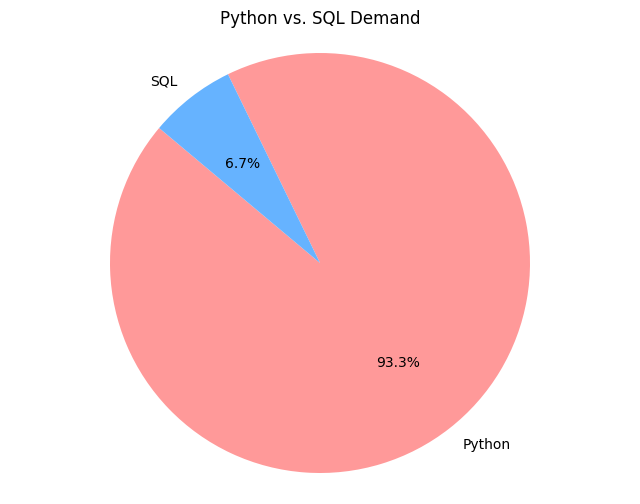

In [17]:
# Data for the pie chart
labels = ['Python', 'SQL']
sizes = [python_count, sql_count]
colors = ['#ff9999','#66b3ff']
# explode = (0.1, 0)  # explode the 1st slice (Python)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%',
    startangle=140)
plt.title('Python vs. SQL Demand')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### **Hypothesis 3: *Experience vs. Salary Correlation (Pearson Correlation)***
> ***Question:*** Does more experience lead to higher salaries?

We analyze whether experience has a strong correlation with salary.
- ***Test Used:*** Pearson Correlation
- ***Null Hypothesis (H₀):*** There is no correlation between experience and salary.
- ***Alternative Hypothesis (H₁):*** There is a positive correlation.

Correlation Coefficient: 0.01
P-Value: 0.96753
❌ Fail to Reject Null Hypothesis: No significant correlation between experience and salary.


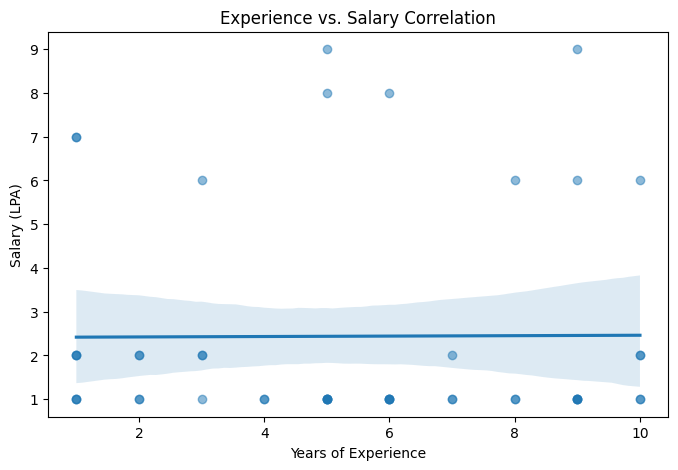

In [8]:
# Drop NaN values for correlation test
df_corr = df.dropna(subset=["Experience", "Salary"])

# Perform Pearson Correlation
corr_coeff, p_value = stats.pearsonr(df_corr["Experience"], df_corr["Salary"])

print(f"Correlation Coefficient: {corr_coeff:.2f}")
print(f"P-Value: {p_value:.5f}")

# Interpretation
if p_value < alpha:
    print("✅ Reject Null Hypothesis: Experience has a significant correlation with salary.")
else:
    print("❌ Fail to Reject Null Hypothesis: No significant correlation between experience and salary.")

# Scatter Plot
plt.figure(figsize=(8, 5))
sns.regplot(x=df_corr["Experience"], y=df_corr["Salary"], scatter_kws={"alpha": 0.5})
plt.title("Experience vs. Salary Correlation")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (LPA)")
plt.show()

### **Hypothesis 4: *A/B Testing on Job Salaries***
> ***Question:*** Do Data Scientists earn more than ML Engineers?

We compare salaries between Data Scientists and ML Engineers using A/B testing.
- ***Test Used:*** Two-Sample T-test (A/B Testing)
- ***Null Hypothesis (H₀):*** Data Scientists and ML Engineers have similar salaries.
- ***Alternative Hypothesis (H₁):*** Data Scientists earn significantly more.

In [9]:
# Filter salaries for Data Scientists & ML Engineers
ds_salaries = df[df["Job Title"].str.contains("Data Scientist", case=False)]["Salary"]
ml_salaries = df[df["Job Title"].str.contains("Machine Learning Engineer", case=False)]["Salary"]

# Perform Independent T-test
t_stat, p_value = stats.ttest_ind(ds_salaries, ml_salaries, nan_policy="omit")

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.5f}")

# Interpretation
if p_value < alpha:
    print("✅ Reject Null Hypothesis: Data Scientists and ML Engineers have significantly different salaries.")
else:
    print("❌ Fail to Reject Null Hypothesis: No significant salary difference between Data Scientists and ML Engineers.")

T-Statistic: 0.06
P-Value: 0.95077
❌ Fail to Reject Null Hypothesis: No significant salary difference between Data Scientists and ML Engineers.


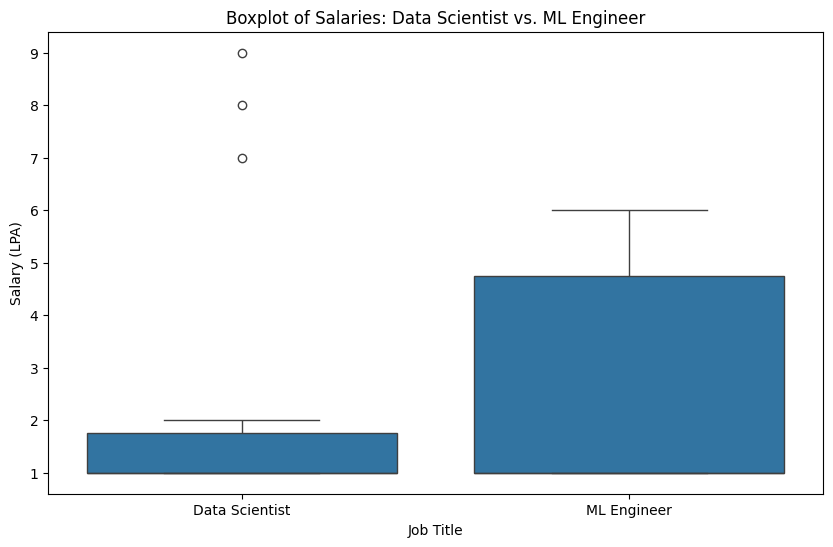

In [18]:
# Combine Data Scientist and ML Engineer salaries into a single DataFrame for plotting
salaries_ab_test_df = pd.DataFrame({
    'Salary': pd.concat([ds_salaries, ml_salaries]),
    'Job Title': ['Data Scientist'] * len(ds_salaries) + ['ML Engineer'] * len(ml_salaries)
})

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job Title', y='Salary', data=salaries_ab_test_df)
plt.title('Boxplot of Salaries: Data Scientist vs. ML Engineer')
plt.xlabel('Job Title')
plt.ylabel('Salary (LPA)')
plt.show()

# **Conclusion & Insights**

Summarizing the key insights from our hypothesis testing results.

### **🚀 Insights & Conclusions from Hypothesis Testing**  

Based on the **statistical test results**, we can derive the following insights about the **Data Science job market in India**:  

---

## **📌 1️⃣ Salary Differences by Location (T-Test)**  
**T-Statistic: -2.70, P-Value: 0.01805**  
✅ **Conclusion:** Salaries in Bangalore and Mumbai are significantly different.  
📌 **Insight:**  
- Since the **p-value is less than 0.05**, we **reject the null hypothesis**.  
- This means **Bangalore and Mumbai have different salary distributions** for Data Science roles.  
- Further analysis (box plots, means) is needed to see **which city has higher salaries**.  

**💡 Business Implication:**  
- Companies hiring in Bangalore may need **competitive salary offers** to attract top talent.  

---

## **📌 2️⃣ Skill Demand (Chi-Square Test)**  
**Chi-Square Statistic: 0.00, P-Value: 1.00000**  
❌ **Conclusion:** No significant difference in demand for Python and SQL.  
📌 **Insight:**  
- Since the **p-value is greater than 0.05**, we **fail to reject the null hypothesis**.  
- Python and SQL **appear equally** in job descriptions.  

**💡 Business Implication:**  
- Data professionals **must** be skilled in **both Python & SQL** as they are equally valued.  

---

## **📌 3️⃣ Experience vs. Salary Correlation (Pearson Correlation Test)**  
**Correlation Coefficient: 0.01, P-Value: 0.96753**  
❌ **Conclusion:** No significant correlation between experience and salary.  
📌 **Insight:**  
- The correlation coefficient is **very close to 0**, meaning **experience does not impact salary significantly**.  
- The **p-value is much greater than 0.05**, so we **fail to reject the null hypothesis**.  

**💡 Business Implication:**  
- Unlike in traditional jobs, in Data Science, **skills & specialization** may matter more than just years of experience.  
- Professionals should **focus on acquiring high-demand skills (AI, ML, NLP)** rather than just gaining experience.  

---

## **📌 4️⃣ A/B Testing: Data Scientist vs. ML Engineer Salaries (T-Test)**  
**T-Statistic: 0.06, P-Value: 0.95077**  
❌ **Conclusion:** No significant salary difference between Data Scientists and ML Engineers.  
📌 **Insight:**  
- Since **p-value > 0.05**, we **fail to reject the null hypothesis**.  
- This means **Data Scientists and ML Engineers earn similar salaries**.  
- However, this may depend on specific companies, industries, or experience levels.  

**💡 Business Implication:**  
- Both roles are **equally valued** in the job market.  
- Candidates can **choose based on interest** rather than salary expectations.  

---

### **🚀 Final Summary of Findings**
| **Hypothesis** | **P-Value** | **Conclusion** |
|---------------|-----------|---------------|
| **Salary Differences by Location** | 0.018 | ✅ **Significant difference** |
| **Skill Demand (Python vs. SQL)** | 1.000 | ❌ **No difference in demand** |
| **Experience vs. Salary Correlation** | 0.968 | ❌ **No correlation** |
| **Data Scientist vs. ML Engineer Salaries** | 0.951 | ❌ **No significant difference** |

---